# Computer games market research.

Project Description:

This project is for an online store of computer games. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. We need to identify the patterns that determine the success of the game. This will allow us to place a bet on a potentially popular product and plan advertising campaigns.

Data description:

Name - the name of the game

Platform - platform

Year_of_Release - year of release

Genre - game genre

NA_sales - sales in North America (millions of copies sold)

EU_sales - sales in Europe (millions of copies sold)

JP_sales - sales in Japan (millions of copies sold)

Other_sales - sales in other countries (millions of copies sold)

Critic_Score - critics' score (maximum 100)

User_Score - user rating (maximum 10)

Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may be incomplete.

## 1. Lets look at the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('games.csv')
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2. Data preprocessing.

In [4]:
# Let's fix the column names:

data.columns = data.columns.str.lower()
print(data.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
# Replacing gaps in a column 'rating':

data['rating'] = data['rating'].fillna('unrated')

In [6]:
# Delete the remaining rows with empty values in 'year_of_release':

data = data.dropna(subset=['year_of_release'])

In [7]:
# Delete the remaining rows with empty values in the column 'name':

data = data.dropna(subset=['name'])

In [8]:
# Let's create a new column 'total_sales':

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [9]:
# Converting a column 'year_of_release':

data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
# Converting a column 'user_score':

data.loc[(data.user_score == 'tbd'), 'user_score'] = ''

'tbd' values mean 'to be determined', which tells us that the rating has not yet been issued. In our case, this means there is no rating. Let's replace all such values with emptiness.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [12]:
# Check:

data.info()
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario B

## 3. Exploratory data analysis.

<AxesSubplot:>

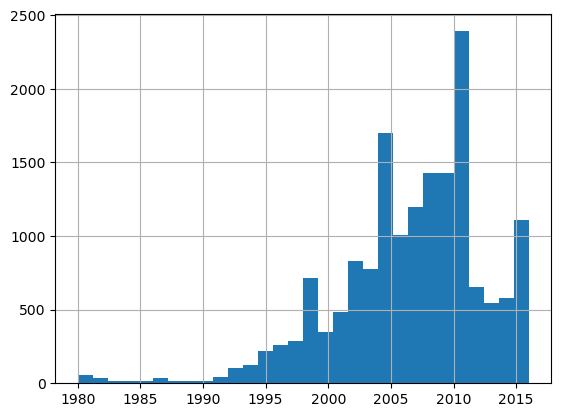

In [13]:
# Let's see when the games came out:

data['year_of_release'].hist(bins = 30)

We see that the real growth in the production of games began in 1990. This is certainly due to the development of computer technology. I believe that for our study there will be enough data for the period 2014-2016. The period from 1980 to 2005 is objectively the “distant past” from the point of view of the computer games industry and will not help us in forecasting for 2017. At the same time, I must note that in the context of genres and a certain cyclicality of everything, some forecast of the popularity of this or that it is possible to build.

In [14]:
# Let's discard the tail that is unnecessary for analysis:

data = data.loc[data['year_of_release'] >= 2014]

In [15]:
# Let's find out which platforms showed the best sales:

data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

In [16]:
# Let's make a general idea of sales in the context of years and platforms:

data.pivot_table('total_sales', index = 'platform', columns = 'year_of_release')

year_of_release,2014,2015,2016
platform,,,
3DS,0.547000,0.323023,0.329130
PC,0.282553,0.170400,0.097222
PS3,0.442222,0.230411,0.094737
PS4,1.333333,0.867883,0.422256
PSP,0.024000,0.040000,NaN
PSV,0.119000,0.056818,0.050000
Wii,0.625000,0.285000,0.180000
WiiU,0.710645,0.583929,0.328571
X360,0.551429,0.341714,0.116923


We can see that in 2016 the top five sales are as follows:

1. PS4
2. 3ds
3. Wii U
4. xone
5. Wii

I must admit that the result was unexpected for me personally. I am sure that the secret lies in the sales regions. The tastes of players in the post-Soviet space are probably very different from those of the Japanese.

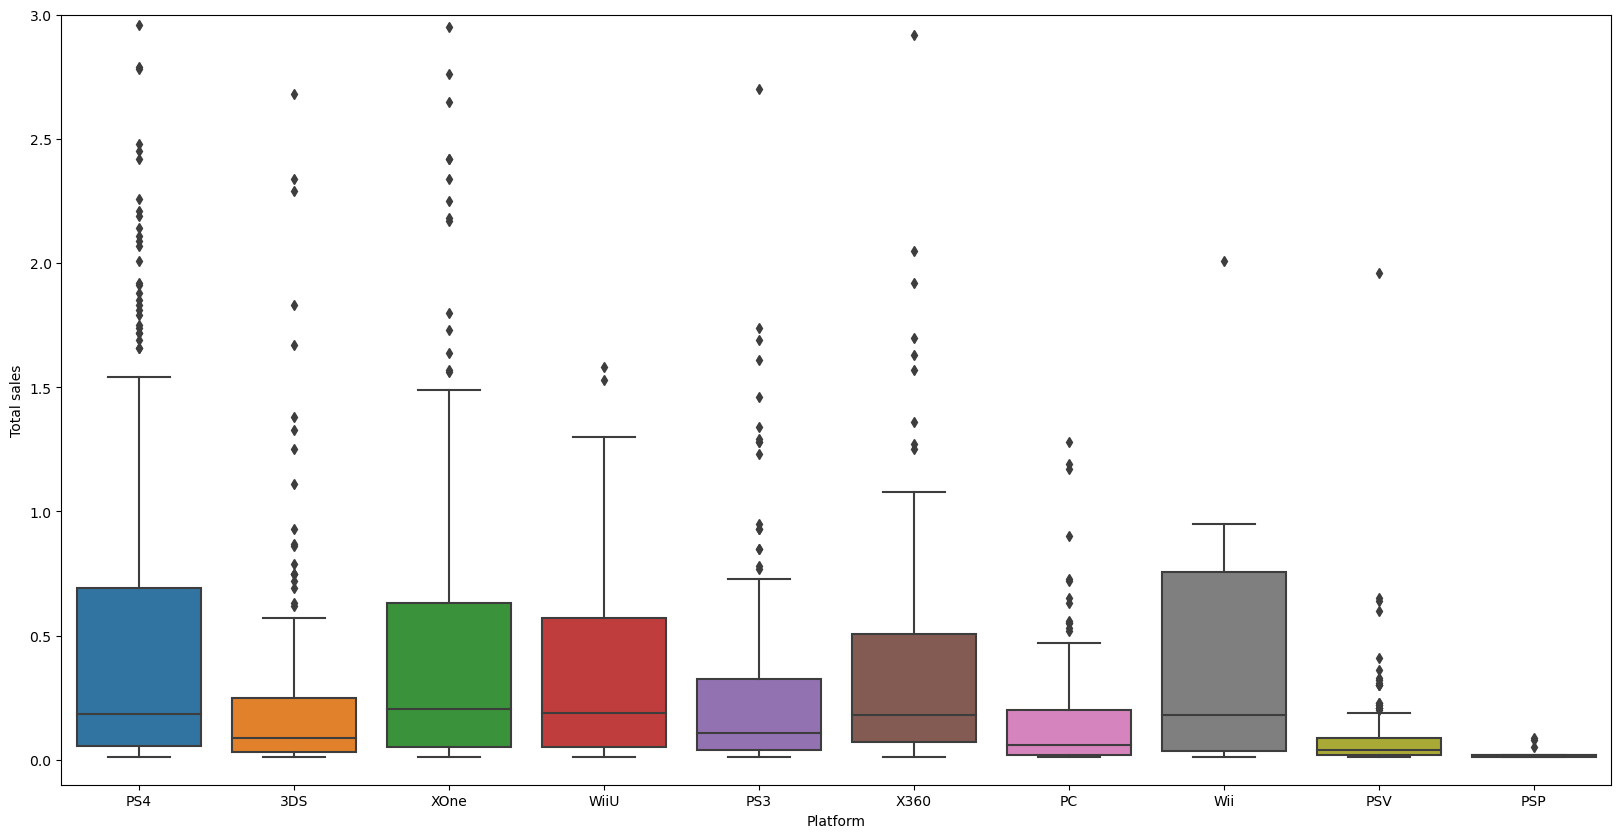

In [17]:
# Let's buitd a boxplot:

plt.figure(figsize=(20,10))
sns.boxplot(
    data = data,
    y='total_sales',
    x='platform');
plt.ylim(-0.1, 3)
plt.ylabel('Total sales')
plt.xlabel('Platform')
plt.show() 

Our graph shows that the bulk of the values do not go beyond 1 million copies. Of course, there are record holders, which suggests that local holidays took place on each of the presented platforms. Of course, the more such celebrations, the more popular the platform. Well, or vice versa. Egg or chicken? In the diagrams, now clearly, you can see the confrontation between Microsoft and Sony.

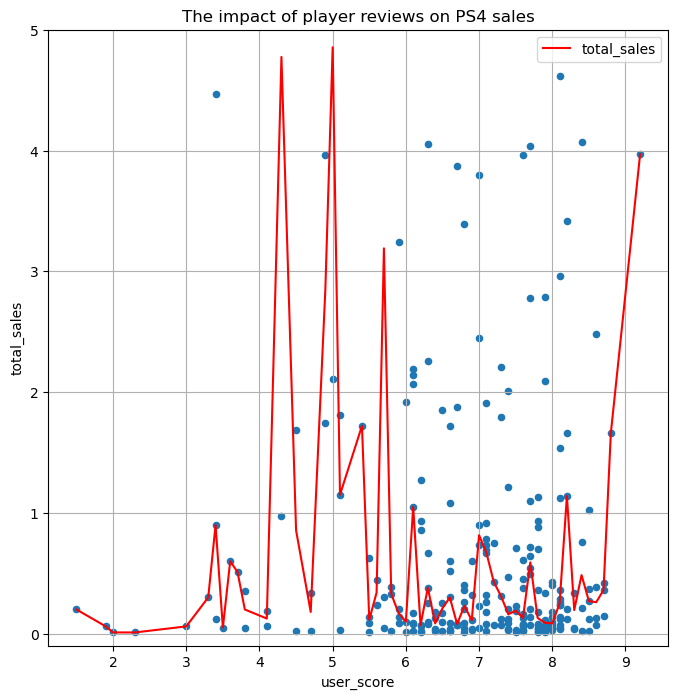

In [18]:
# Using the PS4 as an example, let's see how reviews affect sales. Let's build a diagram:

ps4_data = data.query('platform == "PS4"')[['total_sales', 'user_score', 'critic_score']]
ax = ps4_data.plot(x='user_score', y='total_sales', kind='scatter')
plt.ylim(-0.1, 5)
plt.title('The impact of player reviews on PS4 sales');
ps4_data_median = data.query('platform == "PS4"').pivot_table(index = 'user_score', values = 'total_sales', aggfunc = 'median')
ps4_data_median.plot(ax = ax, color = 'red', figsize = (8, 8), grid = True);

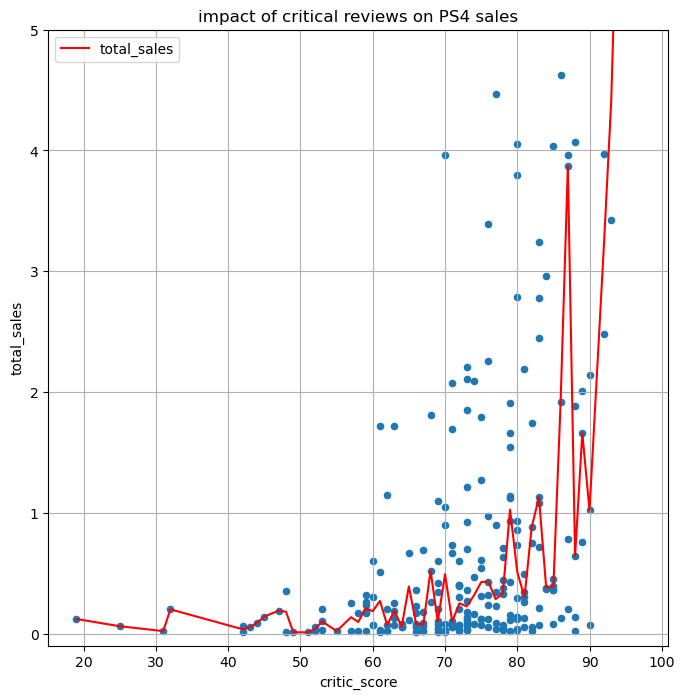

In [19]:
ax = ps4_data.plot(x='critic_score', y='total_sales', kind='scatter')
plt.ylim(-0.1, 5)
plt.title('impact of critical reviews on PS4 sales');
ps4_data_median = data.query('platform == "PS4"').pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = 'median')
ps4_data_median.plot(ax = ax, color = 'red', figsize = (8, 8), grid = True);

In [20]:
# Let's calculate the correlation between player/critic reviews and sales for PS4:

print('Correlation of sales and player reviews:', ps4_data['user_score'].corr(ps4_data['total_sales']))
print('Correlation between sales and reviews from critics:', ps4_data['critic_score'].corr(ps4_data['total_sales']))

Correlation of sales and player reviews: -0.04013158947269733
Correlation between sales and reviews from critics: 0.4026614106810407


The Graph shows that the relationship between recalls and sales is weak. This may be due to many factors. Fans of certain games and genres can make purchases based on reviews and want to create their own experience. I release sequels to many games, and if the first part is good, there will be a second one, with or without reviews...

Without drawing new graphs, let’s check whether the dependence remains the same using the example of other popular platforms. For greater accuracy of analysis, we will take platforms from other manufacturers.

In [36]:
# Let's calculate the correlation between player/critic reviews and sales for x360:

x360_data = data.query('platform == "X360"')[['total_sales', 'user_score', 'critic_score']]
print('Correlation of sales and player reviews:', x360_data['user_score'].corr(x360_data['total_sales']))
print('Correlation between sales and reviews from critics:', x360_data['critic_score'].corr(x360_data['total_sales']))

Correlation of sales and player reviews: -0.1384445709456651
Correlation between sales and reviews from critics: 0.5257228356581521


In [37]:
# Let's calculate the correlation between player/critic reviews and sales for WiiU:

wiiu_data = data.query('platform == "WiiU"')[['total_sales', 'user_score', 'critic_score']]
print('Correlation of sales and player reviews:', wiiu_data['user_score'].corr(wiiu_data['total_sales']))
print('Correlation between sales and reviews from critics:', wiiu_data['critic_score'].corr(wiiu_data['total_sales']))

Correlation of sales and player reviews: 0.40792645792170795
Correlation between sales and reviews from critics: 0.37564022183899803


A fairly strong correlation between reviews from both players and critics and sales was discovered. It turned out to be curious that on the platforms of “Western” companies, buyers mainly pay attention to reviews from critics. Whereas on the WiiU platform the correlation is strong for both player and critic reviews.

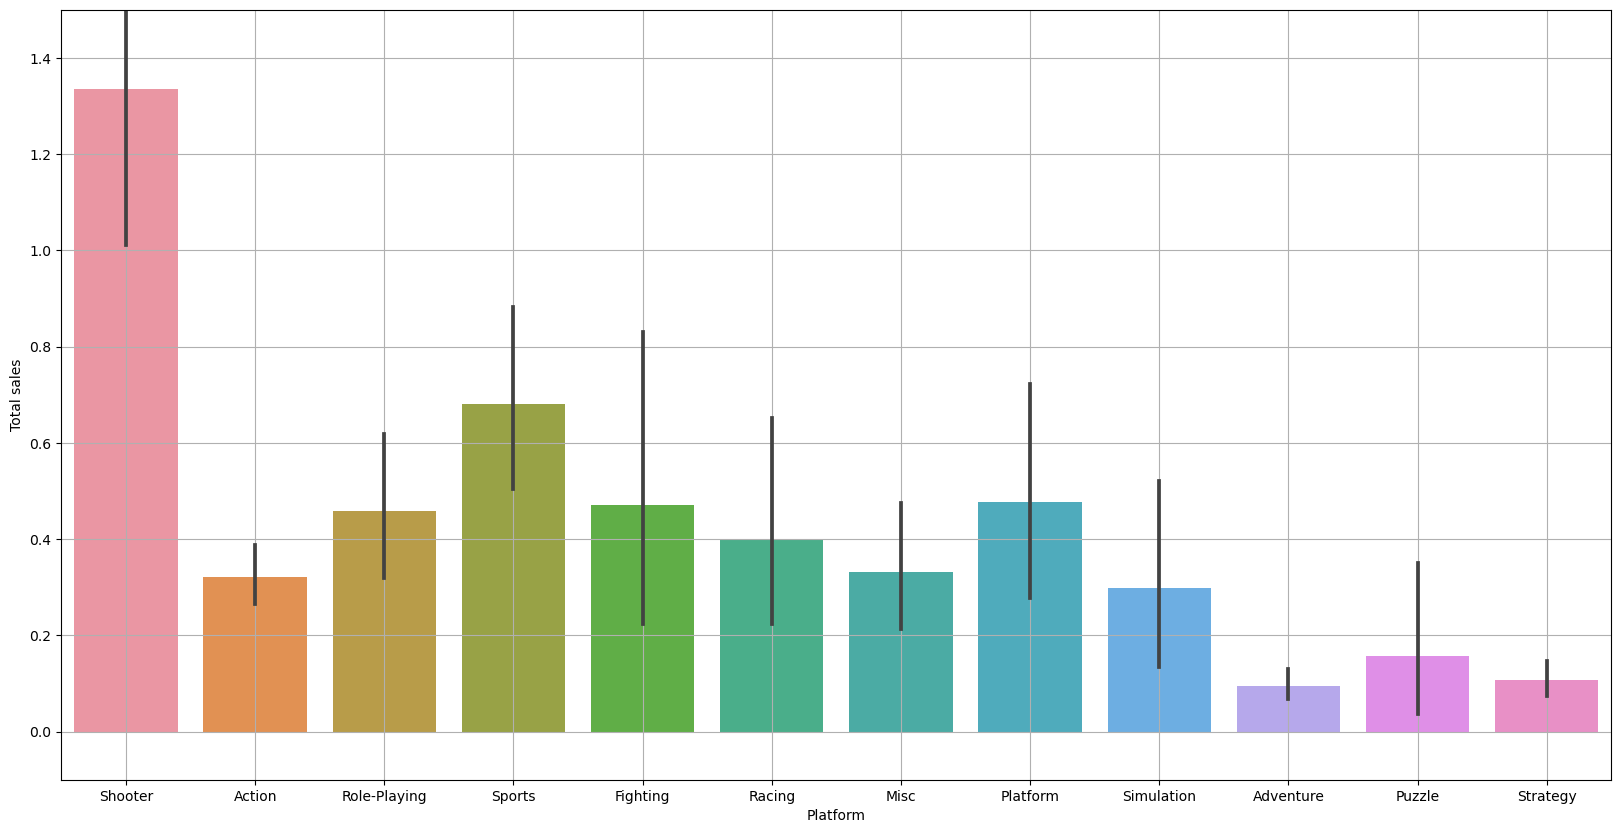

In [23]:
# Let's see which genres sell better than others:

plt.figure(figsize=(20,10))
sns.barplot(
    data = data,
    y='total_sales',
    x='genre');
plt.ylim(-0.1, 1.5)
plt.ylabel('Total sales')
plt.xlabel('Platform')
plt.grid(True)
plt.show() 

The top five most popular genres look like this:

Shooters
Platformers
Sport
Race
Role-playing
The worst-selling games are in the adventure genre.

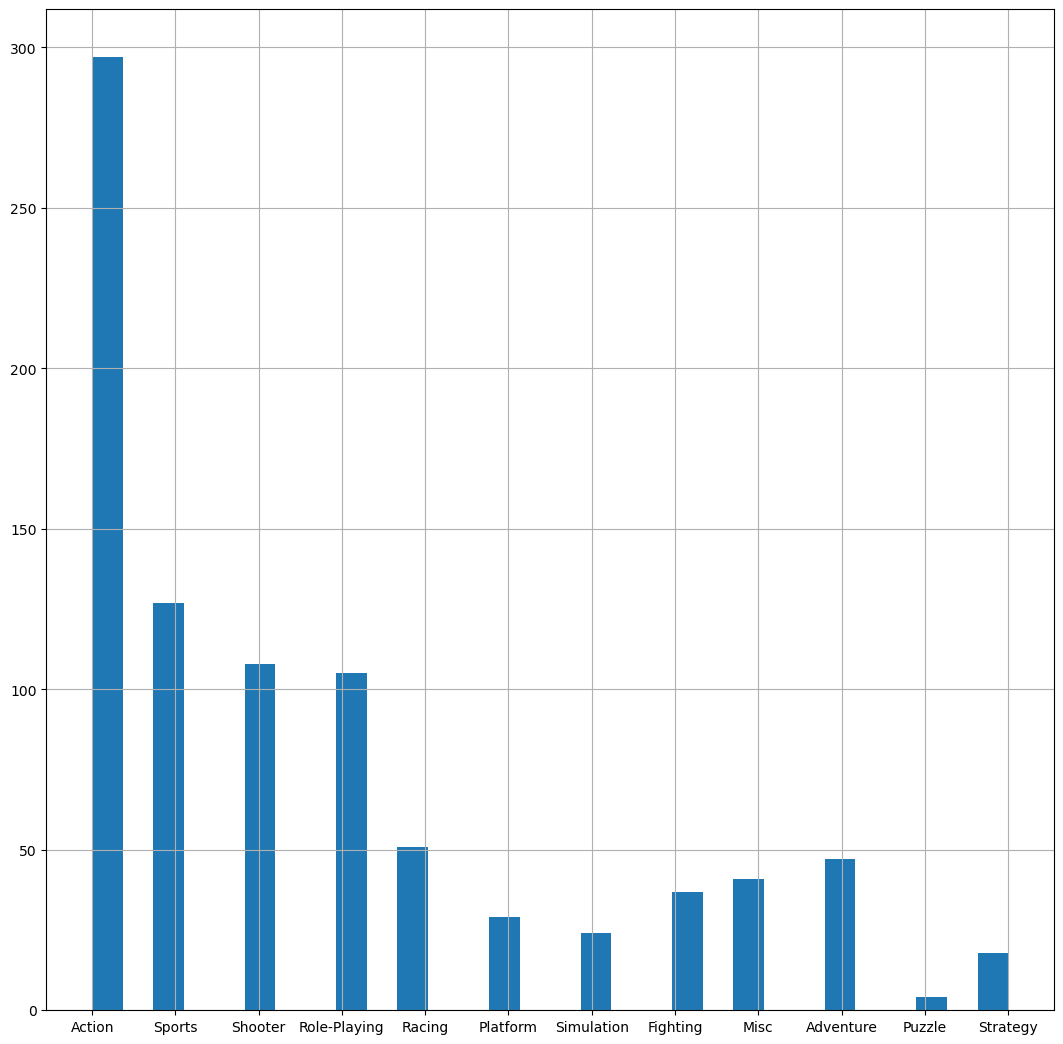

In [38]:
# Let's see the general distribution of genres:

data['genre'].hist(bins = 30, figsize = (13, 13));

Games in the Action genre are released by an extremely large margin. The least number of puzzles and strategies are produced.

              total_sales
genre                    
Shooter             0.515
Sports              0.180
Platform            0.140
Fighting            0.125
Role-Playing        0.110
Simulation          0.100
Action              0.090
Misc                0.090
Racing              0.090
Strategy            0.060
Puzzle              0.045
Adventure           0.030


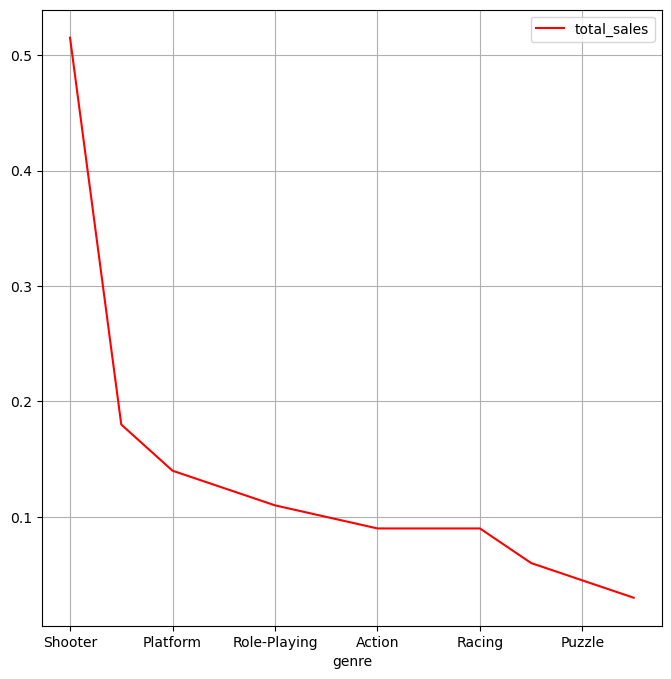

In [25]:
genre_data_median = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')\
.sort_values(by='total_sales', ascending=False)
print(genre_data_median)
genre_data_median.plot(color = 'red', figsize = (8, 8), grid = True);

When considering median sales, it is clearly seen that the highest income is generated by games in the Shooter, Misc and Action genres.

## 4. User profiles.

In [26]:
# Let's create a user profile for North America:

na_user_platform = data.pivot_table(index = 'platform', values = 'na_sales').sort_values(by='na_sales', ascending=False)
na_user_platform['part'] = na_user_platform['na_sales'] / na_user_platform['na_sales'].sum()*100
print(na_user_platform.head(5))

na_user_genre = data.pivot_table(index = 'genre', values = 'na_sales').sort_values(by='na_sales', ascending=False)
na_user_genre['part'] = na_user_genre['na_sales'] / na_user_genre['na_sales'].sum()*100
print(na_user_genre.head(5))

          na_sales       part
platform                     
XOne      0.356447  22.391881
WiiU      0.265205  16.660102
PS4       0.262261  16.475108
X360      0.254955  16.016168
Wii       0.189091  11.878615
              na_sales       part
genre                            
Shooter       0.617344  31.157514
Sports        0.286522  14.460833
Fighting      0.207167  10.455760
Platform      0.178684   9.018243
Role-Playing  0.151448   7.643622


In [27]:
# Let's evaluate the impact of the ESRB rating on sales in the region:

na_user_esrb = data.pivot_table(index = 'rating', values = 'na_sales').sort_values(by='na_sales', ascending=False)
print(na_user_esrb)

         na_sales
rating           
M        0.363849
E        0.231689
E10+     0.179622
T        0.143727
unrated  0.086409


Conclusion for the North America region:

The five most successful sales platforms take over 50% of the market. The leader is Microsoft with a share of more than 38%.

Shooters rightfully occupy leading positions in genres (more than 31%). In second place is Sports. Games in the Fighting genre have always been popular and rightfully round out the top three.

As for the ratings, it is expected that in the first place there is a very “not childish” rating “Mature”, in 2nd place there are games with a rating of “Everyone” or “For everyone”. Rounding out the top three are games for audiences over 10 years old.

In [28]:
# Let's create a user profile for Europe:

eu_user_platform = data.pivot_table(index = 'platform', values = 'eu_sales').sort_values(by='eu_sales', ascending=False)
eu_user_platform['part'] = eu_user_platform['eu_sales'] / eu_user_platform['eu_sales'].sum()*100
print(eu_user_platform.head(5))

eu_user_genre = data.pivot_table(index = 'genre', values = 'eu_sales').sort_values(by='eu_sales', ascending=False)
eu_user_genre['part'] = eu_user_genre['eu_sales'] / eu_user_genre['eu_sales'].sum()*100
print(eu_user_genre.head(5))

          eu_sales       part
platform                     
PS4       0.345851  24.228178
Wii       0.235455  16.494484
XOne      0.202851  14.210473
WiiU      0.180137  12.619279
X360      0.139550   9.775975
            eu_sales       part
genre                          
Shooter     0.511875  26.391142
Sports      0.284037  14.644333
Racing      0.204783  10.558138
Platform    0.178947   9.226130
Simulation  0.165909   8.553906


In [29]:
# Let's evaluate the impact of the ESRB rating on sales in the region:

eu_user_esrb = data.pivot_table(index = 'rating', values = 'eu_sales').sort_values(by='eu_sales', ascending=False)
print(eu_user_esrb)

         eu_sales
rating           
M        0.352604
E        0.265114
E10+     0.141405
T        0.125720
unrated  0.078705


Conclusion for the Europe region:

The five most successful sales platforms take over 70% of the market. The leader, unlike America, is Nintendo with a share of more than 28%.

The situation in the distribution of games by genre is very similar to North America. I think that if we draw up a more detailed portrait of a computer game fan in these two regions, indicating gender, age, income...then the picture will be similar. Europeans are certainly not Americans, but I believe that the average player in these regions is practically the same person.

The top ESRB rating repeats the situation in the American market.

In [30]:
# Let's create a user profile for Japan:

jp_user_platform = data.pivot_table(index = 'platform', values = 'jp_sales').sort_values(by='jp_sales', ascending=False)
jp_user_platform['part'] = jp_user_platform['jp_sales'] / jp_user_platform['jp_sales'].sum()*100
print(jp_user_platform.head(5))

jp_user_genre = data.pivot_table(index = 'genre', values = 'jp_sales').sort_values(by='jp_sales', ascending=False)
jp_user_genre['part'] = jp_user_genre['jp_sales'] / jp_user_genre['jp_sales'].sum()*100
print(jp_user_genre.head(5))

          jp_sales       part
platform                     
3DS       0.208679  43.556458
WiiU      0.100137  20.901036
PS3       0.051233  10.693553
PSV       0.049288  10.287638
PS4       0.039947   8.337875
              jp_sales       part
genre                            
Role-Playing  0.140995  21.258249
Fighting      0.106167  16.007020
Platform      0.070789  10.673110
Puzzle        0.066429  10.015606
Simulation    0.052500   7.915559


In [31]:
# Оценим влияние рейтинга ESRB на продажи в регионе:

jp_user_esrb = data.pivot_table(index = 'rating', values = 'jp_sales').sort_values(by='jp_sales', ascending=False)
print(jp_user_esrb)

         jp_sales
rating           
unrated  0.075968
T        0.054539
E        0.040822
M        0.030226
E10+     0.024108


The country of samurai and shoguns is strikingly different from the regions described above. With the exception of PS3 and PS4, the top 5 platform rankings are made up of mobile devices. The leader, Nintendo, takes a record 43.5% of the market.

A role-playing game bursts into the top 5 genre rankings and immediately takes up 21% of all sales. Puzzles and simulators appear.

The situation with ratings is ambiguous. I think the point is that most Japanese games are not rated by the ESRB and to fully analyze them it is necessary to look at CERO ratings.

## 5. Hypothesis testing.

Hypothesis No. 1

H_0: Average user rating for Xbox One = average user rating for PC;

H_a: Average user rating for Xbox One ≠ average user rating for PC;

alpha = 0.05

In [35]:
from scipy import stats as st
data = data.dropna(subset=['user_score'])
xbox = data[data['platform'] == 'XOne']
pc = data[data['platform'] == 'PC']

results = st.ttest_ind(xbox['user_score'], pc['user_score'])

alpha = 0.01

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value:  0.10450507919348415
Failed to reject the null hypothesis


Hypothesis No. 2

H_0: Average user rating for the Action genre = average user rating for the Sports genre.

H_a: Average user rating for the Action genre ≠ average user rating for the Sports genre.

alpha = 0.05

In [34]:
action = data[data['genre'] == 'Action']
sports = data[data['genre'] == 'Sports']

results = st.ttest_ind(action['user_score'], sports['user_score'])

alpha = 0.05

print('p-velue: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-velue:  2.8711147985105864e-19
Rejecting the null hypothesis


In the first case, we were unable to refute the null hypothesis (even with an alpha value of 0.01). It turns out that the average user rating on the Xbox One and PC platforms is the same. In the second case, we refute the null theory, thereby concluding that the average user rating in different genres (Action and Sports) is different.

## 6. Conclusion.

As part of this project, we studied the sales of computer games. Here's what we managed:

We have "cleaned the data". We got rid of passes where necessary. We figured out indicators like 'tbd'. Changed the data types in the columns that require this.
We calculated and added the “total sales” column.
We analyzed the data by year, platform and sales.
We looked at the impact of reviews on sales on one of the popular platforms.
The most popular platforms and genres have been identified.
We compiled profiles of users by region.
We tested the hypotheses.
Here are some general conclusions we were able to draw. Interim observations are presented in the work.

The computer game production industry experienced truly powerful development starting in the mid-90s and grew until 2011, which was followed by a serious decline. What happened in the industry in 2012 can be explained by several factors, but the main ones I would name are the consequences of the global financial crisis of 2008 and the unexpected success of subscription games such as WoW. As a result of the above, a number of manufacturers (THQ and others) left the market, reducing supply and increasing prices. At the same time, online subscriptions have taken a significant bite out of the market while remaining more affordable. Although after the failure the upward trend resumed. He's alive!!!! Alive!!!

A new generation of popular consoles appears approximately every 6-7 years. At the same time, the release of games for the previous generation does not stop and the transition of users occurs gradually. Of course, there are still fans of old consoles and even some fashion for “vintage” games. But this is an inference from information obtained outside the scope of this study. We can clearly conclude that there is a difference between the Asian market and the markets of Europe and America. Conclusions on this issue are presented in the corresponding module of the project.

In closing, I would like to add that if I were making a decision to produce a computer game in 2016, I would probably pay most close attention to developing a platformer game for mobile devices. This solution is explained by the relative simplicity/cheapness of production. Ease of adaptation to all major markets. The growing popularity of mobile devices. The popularity of games of this genre in all regions. What do you choose? Contra or Doodle Jump?))